In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import re
from tensorflow.keras.preprocessing.text import Tokenizer

In [27]:
df = pd.read_csv('IMDB.csv')
df = df.dropna()
df = df[:10000]

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])

In [29]:
len(tokenizer.word_counts)

60101

In [30]:
tokens = tokenizer.texts_to_sequences(df['review'])
#df["tokenReview"] = keras.preprocessing.sequence.pad_sequences(df["tokenReview"], padding='post')
sequences = keras.preprocessing.sequence.pad_sequences(tokens, padding='post', maxlen=1000)

In [31]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [32]:
len(sequences[4])

1000

In [33]:
X, y = sequences, df["sentiment"]
y.replace('positive', 1, inplace=True)
y.replace('negative', 0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\Mohd Arshil\AppData\Local\Temp\ipykernel_7532\394922036.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace('negative', 0, inplace=True)


((8000, 1000), (2000, 1000), (8000,), (2000,))

In [34]:
m = keras.Sequential(
    [
    layers.Embedding(input_dim=62000, output_dim=64),
    layers.SimpleRNN(32, return_sequences=False),
    layers.Dense(1, activation='sigmoid')
    ]
)
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
m.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.15)

Epoch 1/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 30s 127ms/step - accuracy: 0.4863 - loss: 0.6952 - val_accuracy: 0.5067 - val_loss: 0.6944
Epoch 2/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.5045 - loss: 0.6963 - val_accuracy: 0.5075 - val_loss: 0.6933
Epoch 3/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 29s 137ms/step - accuracy: 0.4978 - loss: 0.6931 - val_accuracy: 0.5083 - val_loss: 0.6931
Epoch 4/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 30s 142ms/step - accuracy: 0.5058 - loss: 0.6925 - val_accuracy: 0.5075 - val_loss: 0.6931
Epoch 5/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 31s 144ms/step - accuracy: 0.5053 - loss: 0.6926 - val_accuracy: 0.5075 - val_loss: 0.6931


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
ypred = m.predict(X_test)
ypred = np.round(ypred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


0.5005

In [38]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, np.round(m.predict(X_test)), normalize='true'))

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


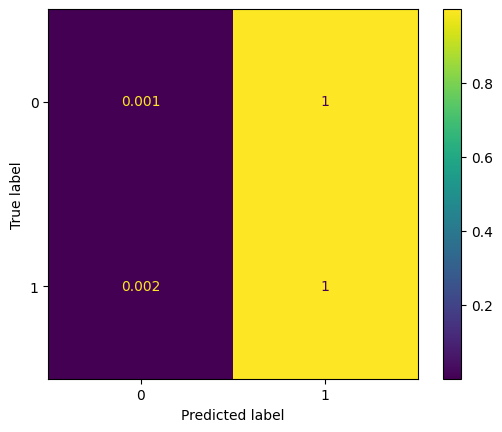

In [39]:
cm.plot()

In [41]:
m.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 1000, 64)       │     3,968,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,913,413 (45.45 MB)

 Trainable params: 3,971,137 (15.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,942,276 (30.30 MB)